In [28]:
##IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

## GENERATING DUMMY CATEGORICAL DATASET AND REGRSSION ANALYSIS

In [29]:
# Set a seed for reproducibility
np.random.seed(42)

# Generate dummy data
data_size = 1000

data = pd.DataFrame({
    'Genders': np.random.choice(['male', 'female'], size=data_size),
    'Age': np.random.choice(['18-25', '25-35', '35-45', '45-55', '55-65', '65+'], size=data_size),
    'Income': np.random.choice([6, 12, 15, 18, 24, 25], size=data_size),
    'Marital_status': np.random.choice(['Single', 'married', 'divorced', 'widowed'], size=data_size),
    'No_of_children': np.random.choice([1, 2, 3, 4, 5], size=data_size),
    'Education': np.random.choice(['<Degree', 'Degree', 'PG', 'Professional Degree', 'Professional PG'], size=data_size),
    'Automobile_ownership': np.random.choice(['Bike', 'Basic car', 'Luxury car', 'SUV'], size=data_size),
    'EV_Propensity': np.random.choice([1, 2, 3, 4, 5], size=data_size)
})
# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Genders', 'Age', 'Marital_status', 'Education', 'Automobile_ownership'])

# Split data into features (X) and target variable (y)
X = data_encoded.drop('EV_Propensity', axis=1)
y = data_encoded['EV_Propensity']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10  8  6  9  7]
 [ 8 13  6 10 11]
 [ 9 12  5  3 10]
 [ 7 14  6  3  5]
 [ 6  9  6  6 11]]

Classification Report:
              precision    recall  f1-score   support

           1       0.25      0.25      0.25        40
           2       0.23      0.27      0.25        48
           3       0.17      0.13      0.15        39
           4       0.10      0.09      0.09        35
           5       0.25      0.29      0.27        38

    accuracy                           0.21       200
   macro avg       0.20      0.20      0.20       200
weighted avg       0.20      0.21      0.21       200



## EXPLORATORY DATA ANALYSIS

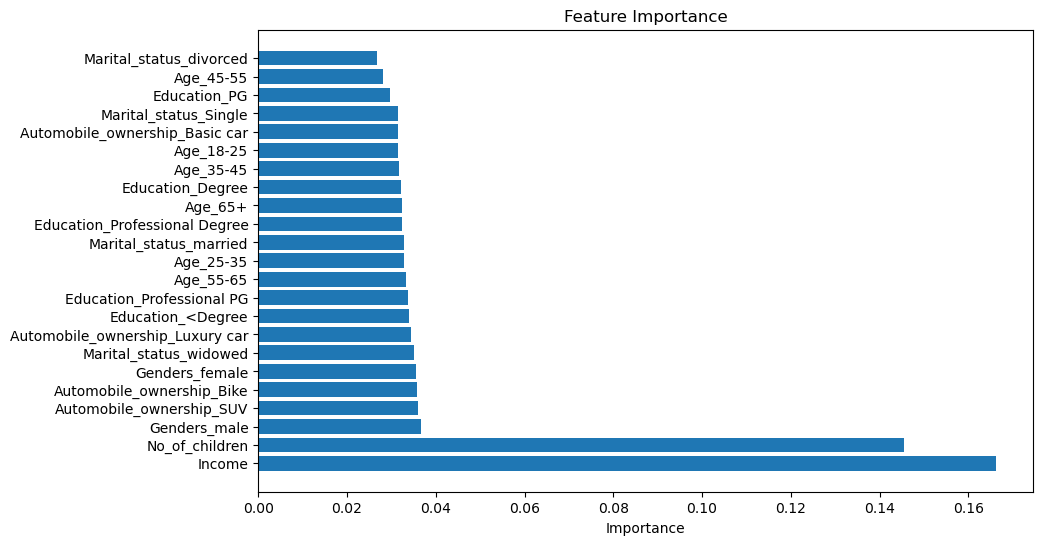

In [30]:

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


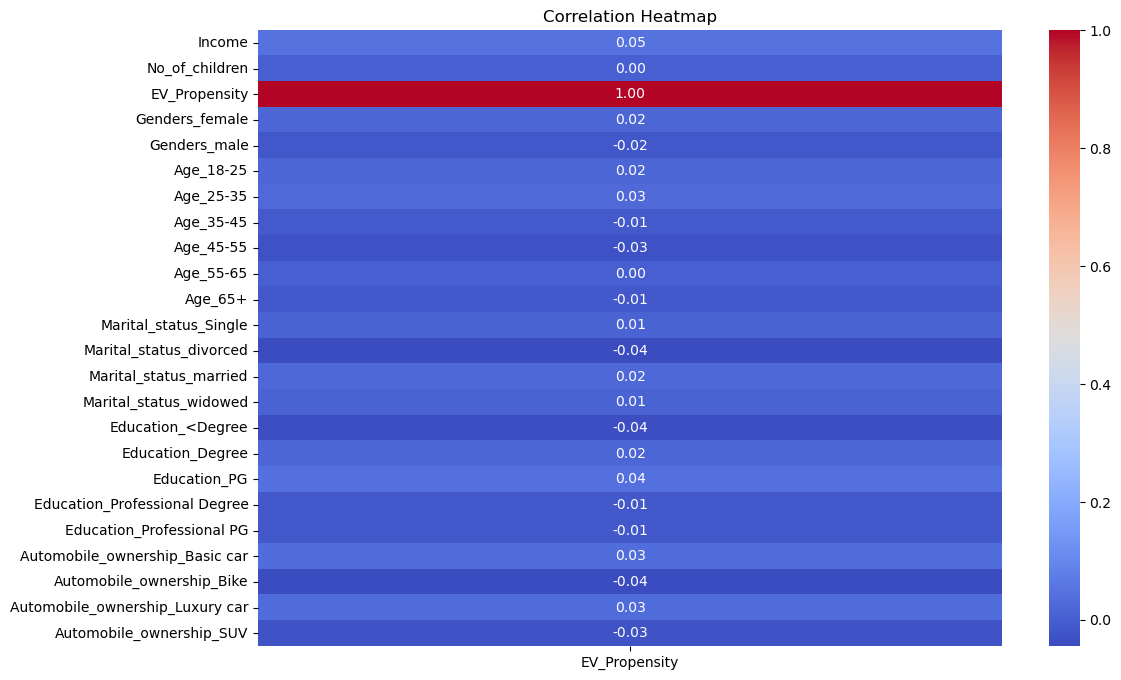

In [31]:
import seaborn as sns

# Create a DataFrame with only the selected columns
heatmap_data = data[['Genders', 'Age', 'Income', 'Marital_status', 'No_of_children', 'Education', 'Automobile_ownership', 'EV_Propensity']]

# Encode categorical variables for the heatmap
heatmap_data_encoded = pd.get_dummies(heatmap_data, columns=['Genders', 'Age', 'Marital_status', 'Education', 'Automobile_ownership'])

# Calculate the correlation matrix
correlation_matrix = heatmap_data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['EV_Propensity']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

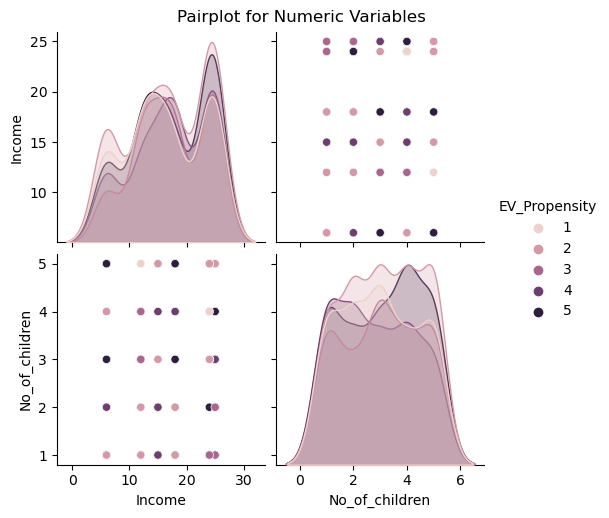

In [32]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for numeric variables
sns.pairplot(data, hue='EV_Propensity')
plt.suptitle('Pairplot for Numeric Variables', y=1.02)
plt.show()

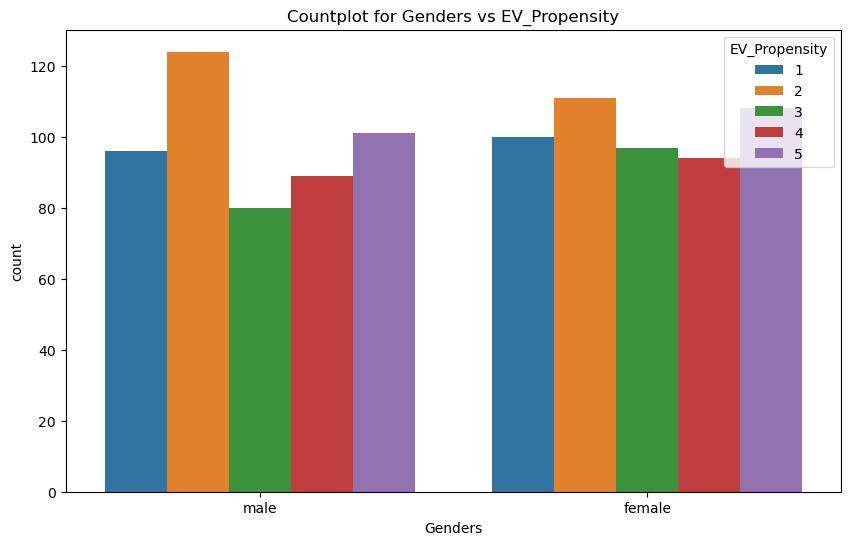

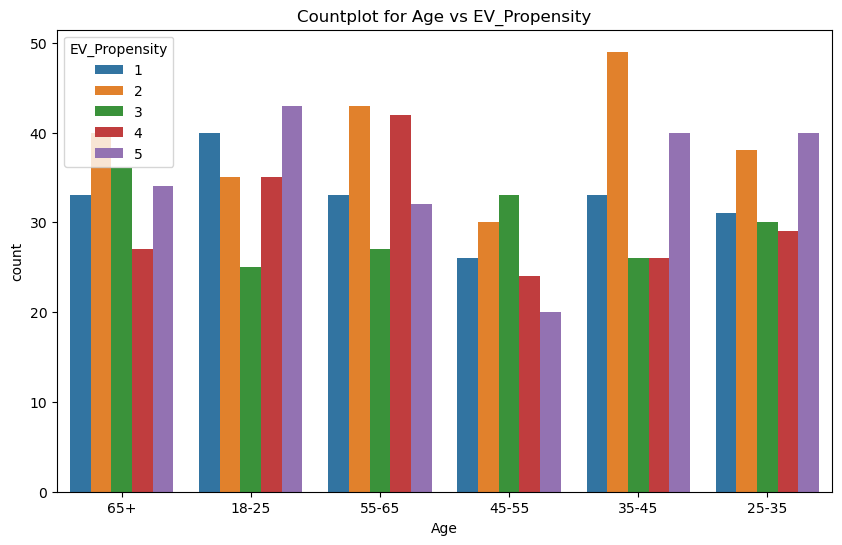

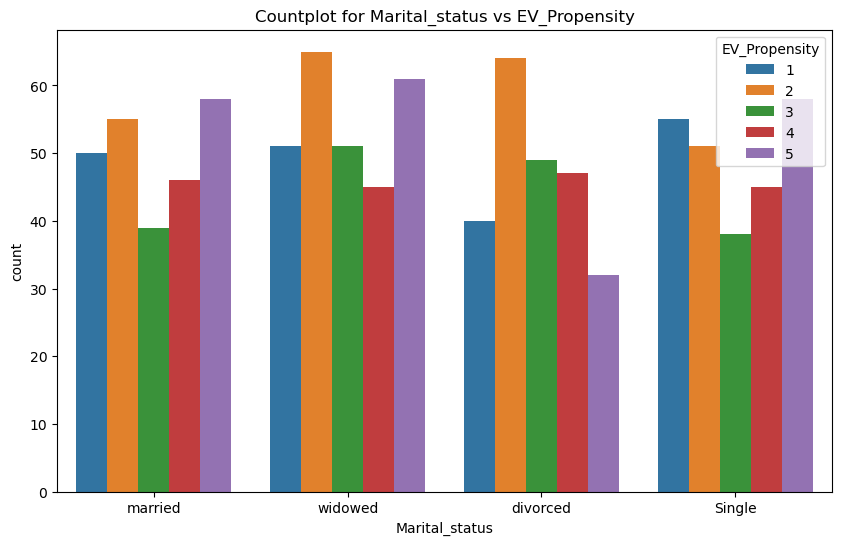

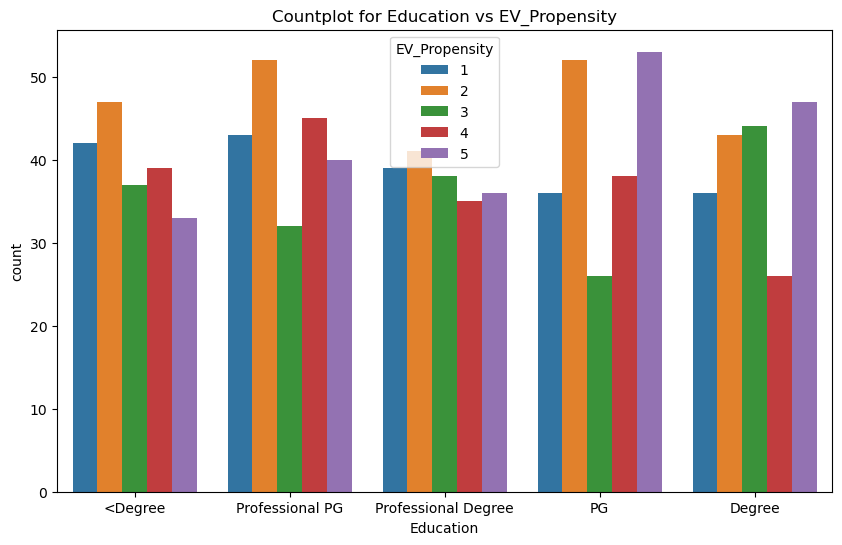

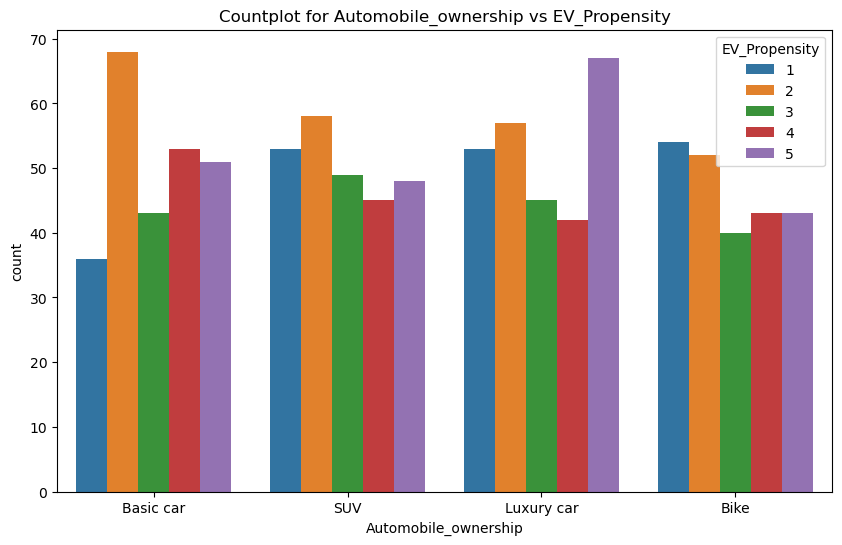

In [33]:
# Countplot for categorical variables
categorical_variables = ['Genders', 'Age', 'Marital_status', 'Education', 'Automobile_ownership']
for variable in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=variable, hue='EV_Propensity', data=data)
    plt.title(f'Countplot for {variable} vs EV_Propensity')
    plt.show()

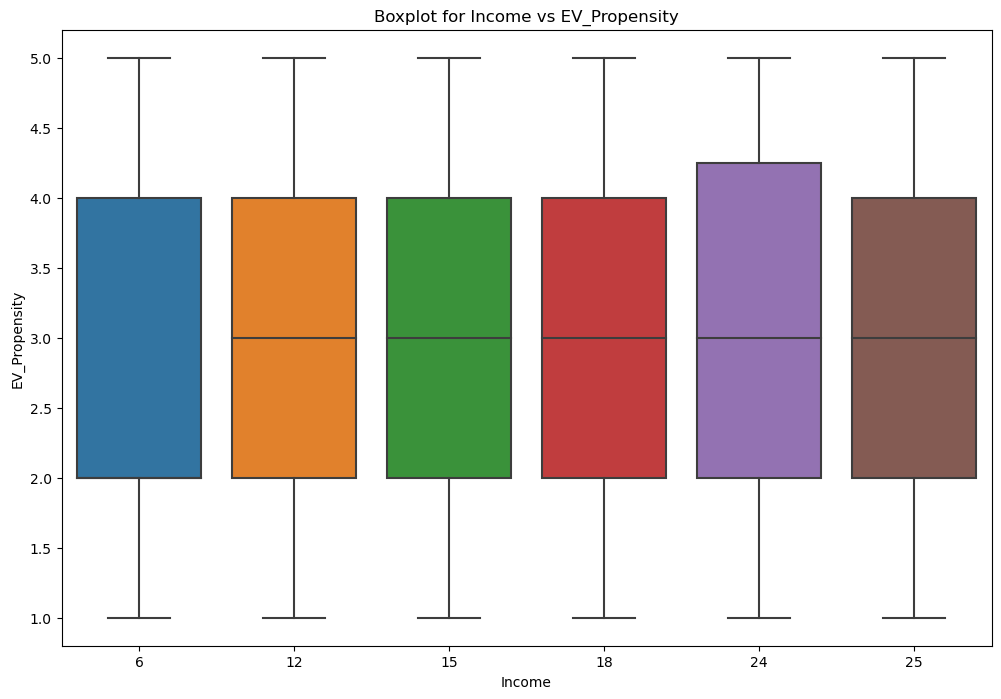

In [34]:
# Boxplot for continuous variables
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income', y='EV_Propensity', data=data)
plt.title('Boxplot for Income vs EV_Propensity')
plt.show()

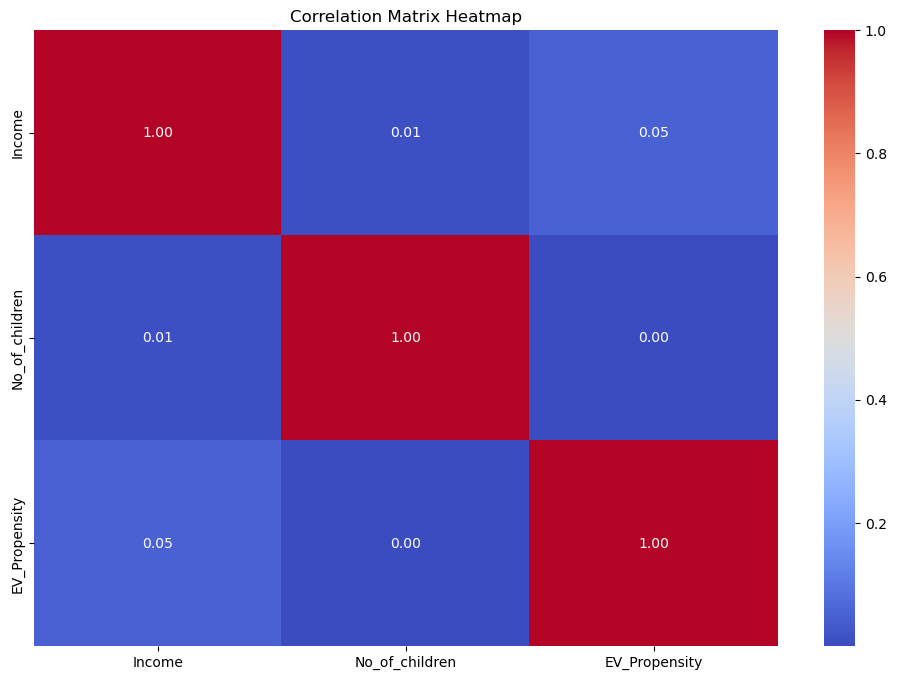

In [35]:
# Correlation matrix heatmap for all variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

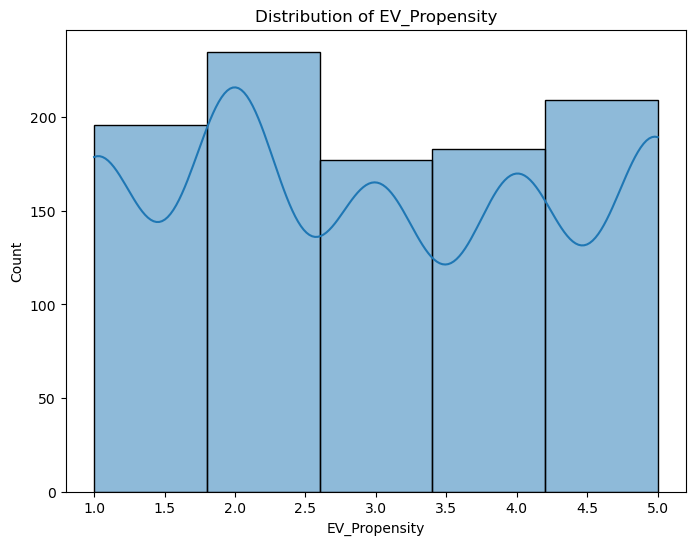

In [36]:
# Distribution of 'EV_Propensity'
plt.figure(figsize=(8, 6))
sns.histplot(data['EV_Propensity'], bins=5, kde=True)
plt.title('Distribution of EV_Propensity')
plt.xlabel('EV_Propensity')
plt.ylabel('Count')
plt.show()

<Figure size 1500x1000 with 0 Axes>

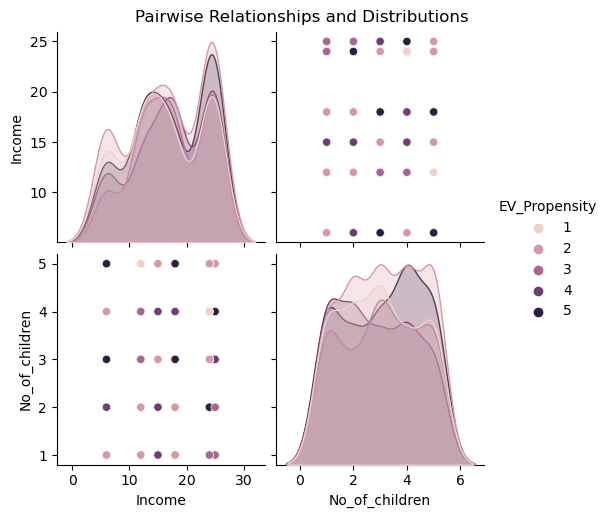

In [37]:
# Pairwise relationships between all variables
plt.figure(figsize=(15, 10))
sns.pairplot(data, hue='EV_Propensity', diag_kind='kde')
plt.suptitle('Pairwise Relationships and Distributions', y=1.02)
plt.show()

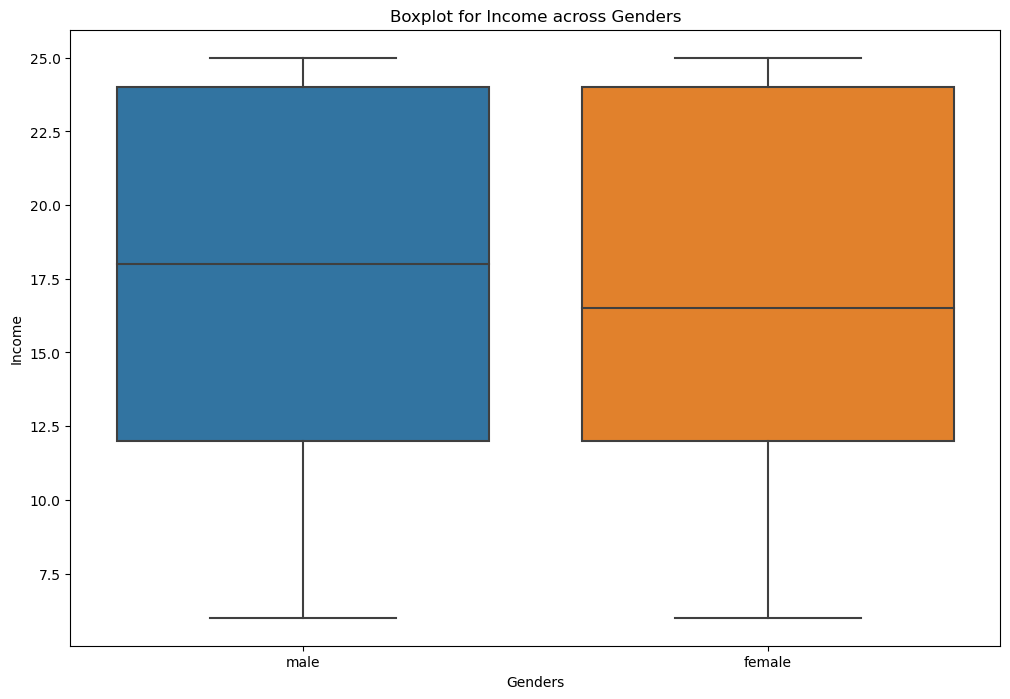

In [38]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genders', y='Income', data=data)
plt.title('Boxplot for Income across Genders')
plt.show()

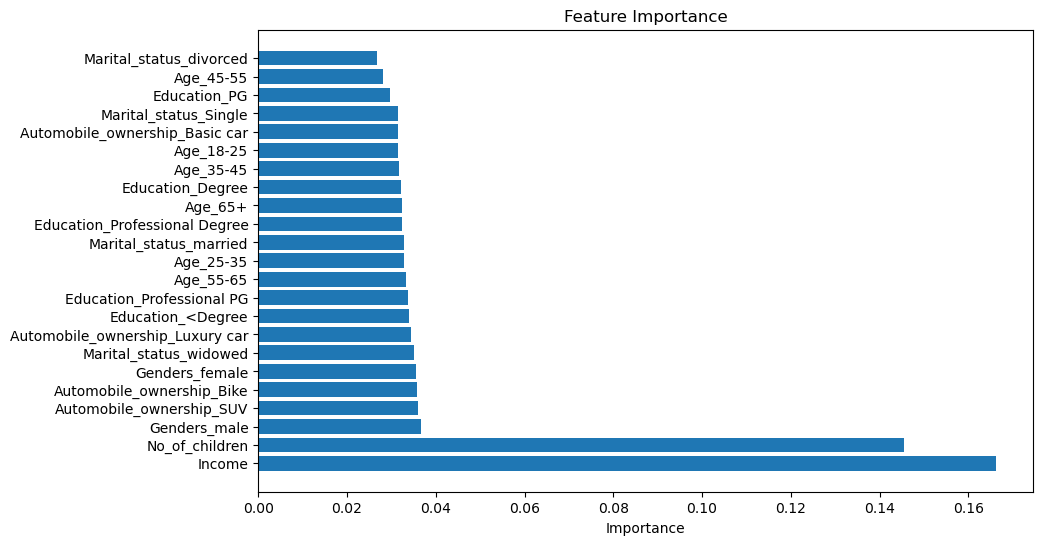

In [39]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables for regression analysis
data_regression = pd.get_dummies(data, columns=['Genders', 'Age', 'Marital_status', 'Education', 'Automobile_ownership'], drop_first=True)

# Split data into features (X) and target variable (y)
X_reg = data_regression.drop('EV_Propensity', axis=1)
y_reg = data_regression['EV_Propensity']

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train a Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluate the regression model
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R-squared:", r2_score(y_test_reg, y_pred_reg))



Mean Squared Error: 2.0807349881772055
R-squared: -0.057404931039984675


## CLUSTER ANALYSIS

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select relevant features for clustering
features_for_clustering = ['Income', 'No_of_children']

# Extract selected features
X_cluster = data[features_for_clustering]

# Standardize the features for clustering
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_cluster_scaled)


# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='No_of_children', hue='Cluster', data=data, palette='viridis', legend='full')
plt.title('K-means Clustering')
plt.xlabel('Income')
plt.ylabel('No_of_children')
plt.show()

## FACTOR ANALYSIS 

In [44]:
# Apply Factor Analysis
n_factors = 3  # Number of latent factors
factor_analysis = FactorAnalysis(n_components=n_factors, random_state=42)
X_factors = factor_analysis.fit_transform(X_standardized)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_factors, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier on the factorized data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 6 10  7  8  9]
 [12 10  5  8 13]
 [ 2 10  5  6 16]
 [ 4 14  6  4  7]
 [ 6  8  4  5 15]]

Classification Report:
              precision    recall  f1-score   support

           1       0.20      0.15      0.17        40
           2       0.19      0.21      0.20        48
           3       0.19      0.13      0.15        39
           4       0.13      0.11      0.12        35
           5       0.25      0.39      0.31        38

    accuracy                           0.20       200
   macro avg       0.19      0.20      0.19       200
weighted avg       0.19      0.20      0.19       200

